## 1. Introduction

Dataset: The dataset is a compilation of tweets on whether is about a real disaster or not. 

Data size: The training dataset consist of 10873 tweets while the test dataset consist of 10875 tweets.
|
Dimensions: Each tweet is labeled with a binary target value, indicating whether it is about a real disaster (1) or not (0).

Structure: The data includes the following columns:
- id: Unique identifier for each tweet.
- text: The content of the tweet.
- location: The location where the tweet was sent from (may contain missing values).
- keyword: A keyword from the tweet (may contain missing values).
- target: The binary target value (1 if the tweet is about a real disaster, 0 otherwise).

## 2. Exploratory Data Analysis (EDA)

In this section, I will be taking a look at the data in the form of a bar chart and doing some cleaning and preprocessing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/yeoshaojie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#df_labels = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv", index_col=None)
#df_samples = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv", index_col=None)
df_train = pd.read_csv('/Users/yeoshaojie/Desktop/Intro to Deep Learning/Week 4/nlp-getting-started/train.csv')
df_test = pd.read_csv('/Users/yeoshaojie/Desktop/Intro to Deep Learning/Week 4/nlp-getting-started/test.csv')

In [76]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [49]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [28]:
# Check for missing values
missing_values = df_train.isnull().sum()
print(missing_values)

id             0
keyword       61
location    2533
text           0
target         0
length         0
dtype: int64


In [27]:
# Check for missing values
missing_values = df_test.isnull().sum()
print(missing_values)

id             0
keyword       26
location    1105
text           0
length         0
dtype: int64


In [29]:
print('Train Shape = {}'.format(df_train.shape))
print('Test Shape = {}'.format(df_test.shape))

Train Shape = (7613, 6)
Test Shape = (3263, 5)


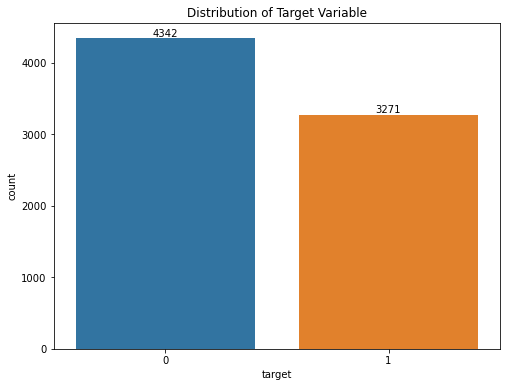

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')

# Annotate the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [35]:
# Most common keywords
common_keywords = df_train['keyword'].value_counts().head(10)
print(common_keywords)

# Most common locations
common_locations = df_train['location'].value_counts().head(10)
print(common_locations)


fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
Name: keyword, dtype: int64
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64


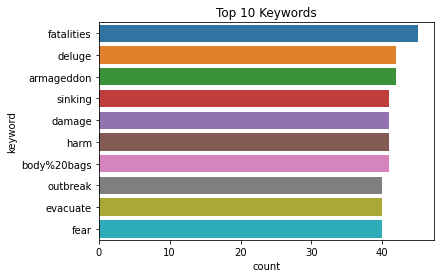

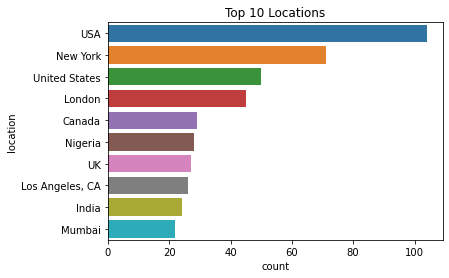

In [42]:
# Distribution of tweets by common keywords
sns.countplot(y='keyword', data=df_train, order=df_train['keyword'].value_counts().iloc[:10].index)
plt.title('Top 10 Keywords')
plt.show()

# Distribution of tweets by common locations
sns.countplot(y='location', data=df_train, order=df_train['location'].value_counts().iloc[:10].index)
plt.title('Top 10 Locations')
plt.show()

In [38]:
#find distribution of length
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64



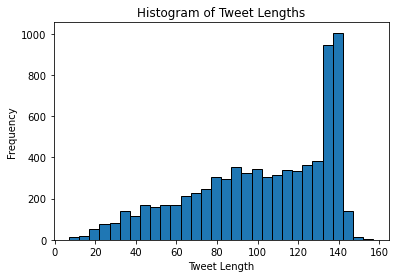

In [46]:
# Add a column for tweet lengths
df_train['tweet_length'] = df_train['text'].apply(len)

# Plot the histogram of tweet lengths
plt.hist(df_train['tweet_length'], bins=30, edgecolor='k')
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

## 3. Model Architecture

GloVe embeddings provide a rich semantic understanding of words and help the model capture the context and meaning of words in tweets. Tweets are short texts where context from both directions is important, and the bidirectional LSTM captures dependencies from both past and future contexts. 

Dropout layers prevent overfitting, especially with small datasets, and spatial dropout in the embedding layer and standard dropout in dense layers help generalize the model. The dense layer with ReLU activation learns complex interactions between features and provides non-linear transformations for better feature representation. The sigmoid activation function in the final layer is suitable for binary classification and converts the output into a probability ranging from 0 to 1.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import re

In [7]:
# Advanced text preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'#\w+', '', text)     # remove hashtags
    text = re.sub(r'\d+', '', text)      # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower().strip()          # convert to lowercase
    return text

In [8]:
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [9]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_train['text'])
X_train = tokenizer.texts_to_sequences(df_train['text'])
X_test = tokenizer.texts_to_sequences(df_test['text'])

In [10]:
# Pad sequences
max_len = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [11]:
# Prepare target variable
y_train = df_train['target']

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [15]:
# Load GloVe embeddings
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_file = '/Users/yeoshaojie/Desktop/Intro to Deep Learning/Week 4/glove.twitter.27B/glove.twitter.27B.100d.txt'
embeddings_index = load_glove_embeddings(glove_file)

In [16]:
# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((5000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 5000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [24]:
# Define the model architecture with GloVe embeddings
def create_model(dropout_rate=0.3, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_len,
                        weights=[embedding_matrix], trainable=False))
    model.add(SpatialDropout1D(dropout_rate))
    model.add(Bidirectional(LSTM(128, dropout=dropout_rate, recurrent_dropout=dropout_rate)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    opt = Adam(learning_rate=learning_rate) if isinstance(optimizer, str) else optimizer
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


In [25]:
# Wrap the model using the function you created
model = KerasClassifier(build_fn=create_model, verbose=0)

/var/folders/h7/rjxfnnp10yndkbddd9yv8l8m0000gn/T/ipykernel_74884/807001069.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [26]:
# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10],
    'dropout_rate': [0.2],
    'optimizer': ['adam', Adam(learning_rate=0.001)]
}


In [29]:
# Create Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=4, n_jobs=-1, cv=3)

# Use a smaller subset of the data for tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Perform` the random search on the smaller dataset
random_search_result = random_search.fit(X_train_small, y_train_small)

/Users/yeoshaojie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/yeoshaojie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/yeoshaojie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/yeoshaojie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1

In [31]:
# Summarize the results
best_score = random_search_result.best_score_
best_params = random_search_result.best_params_

# Print the best parameters and score
print(f"Best: {best_score} using {best_params}")

Best: 0.7676518758138021 using {'optimizer': <keras.optimizer_v2.adam.Adam object at 0x7fadd611a550>, 'epochs': 10, 'dropout_rate': 0.2, 'batch_size': 32}


## 4. Results and Analysis

In [58]:
# Train the final model with the best parameters on the full training data
final_model = create_model(dropout_rate=best_params['dropout_rate'], optimizer=best_params['optimizer'])
history = final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'],
                          validation_data=(X_val, y_val), verbose=1)


Epoch 1/10
191/191 [==============================] - 300s 1s/step - loss: 0.5128 - accuracy: 0.7552 - val_loss: 0.4564 - val_accuracy: 0.7991
Epoch 2/10
191/191 [==============================] - 226s 1s/step - loss: 0.4709 - accuracy: 0.7872 - val_loss: 0.4466 - val_accuracy: 0.7912
Epoch 3/10
191/191 [==============================] - 214s 1s/step - loss: 0.4518 - accuracy: 0.7977 - val_loss: 0.4553 - val_accuracy: 0.8004
Epoch 4/10
191/191 [==============================] - 214s 1s/step - loss: 0.4413 - accuracy: 0.8016 - val_loss: 0.4376 - val_accuracy: 0.7925
Epoch 5/10
191/191 [==============================] - 238s 1s/step - loss: 0.4302 - accuracy: 0.8048 - val_loss: 0.4233 - val_accuracy: 0.8155
Epoch 6/10
191/191 [==============================] - 252s 1s/step - loss: 0.4302 - accuracy: 0.8097 - val_loss: 0.4238 - val_accuracy: 0.8221
Epoch 7/10
191/191 [==============================] - 266s 1s/step - loss: 0.4148 - accuracy: 0.8141 - val_loss: 0.4232 - val_accuracy: 0.8194

In [59]:
# Evaluate the model on the validation set
val_loss, val_accuracy = final_model.evaluate(X_val, y_val, verbose=0)

# Predict on the validation set
y_val_pred_proba = final_model.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

# Prepare test predictions for submission
test_predictions = final_model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)
df_test['target'] = test_predictions

# Save the predictions in the required format
df_test[['id', 'target']].to_csv('/Users/yeoshaojie/Desktop/Intro to Deep Learning/Week 4/nlp-getting-started/sample_submission.csv', index=False)




In [60]:
# Print summary results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")
print(df_test[['id', 'target']].head())

Validation Loss: 0.43802207708358765
Validation Accuracy: 0.8168089389801025
   id  target
0   0       1
1   2       0
2   3       1
3   9       0
4  11       1


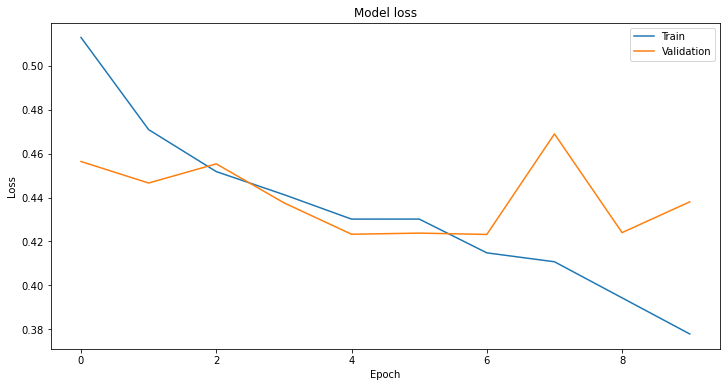

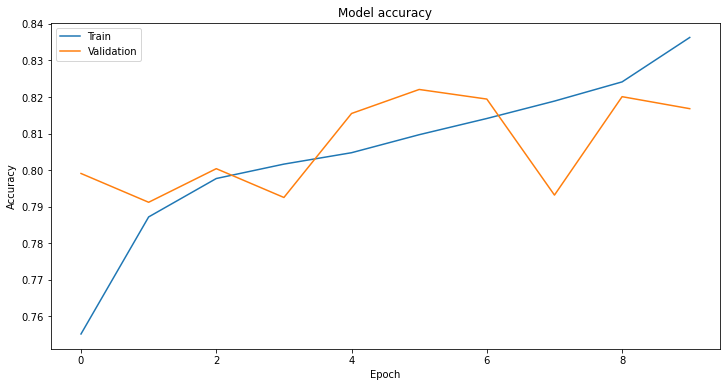

In [61]:

# Plot # Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



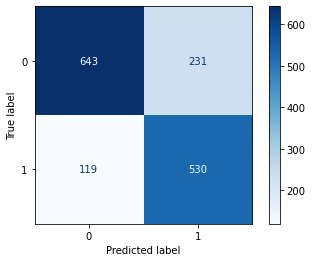

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
# Predict on the validation set
y_val_pred = best_model.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


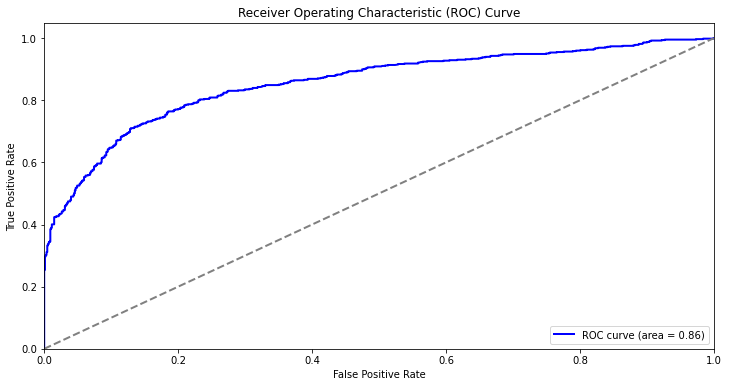

In [65]:
# ROC Curve
# Predict on the validation set
y_val_pred_proba = best_model.predict(X_val)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## 5. Conclusion
### Discussion and Interpretation
1. Validation Metrics:
    - The validation loss of 0.438 and accuracy of approximately 0.817 indicate a reasonably good performance of the model. However, there is still room for improvement, as indicated by the loss and accuracy metrics.


2. Confusion Matrix:
    - The confusion matrix reveals that the model has more true positives and true negatives compared to false positives and false negatives. However, the number of false positives (231) and false negatives (119) is still significant, suggesting that the model could be improved to better distinguish between the two classes.


3. ROC Curve:
    - The ROC curve shows a good performance with an AUC of 0.86. This indicates that the model has a good ability to distinguish between positive and negative classes, but there is still some overlap.


4. Learning Curves:

    - The plots for training and validation loss and accuracy over epochs suggest that the model is learning well without overfitting, as the training and validation metrics converge.


### Learning and takeaway
1. Effective Techniques:
    - GloVe Embeddings: Using pre-trained GloVe embeddings helped the model to start with a better representation of words, improving its ability to understand and classify tweets accurately.
    - Bidirectional LSTM: The use of a Bidirectional LSTM layer allowed the model to capture information from both past and future states, leading to better performance.
    - Hyperparameter Tuning: Randomized search for hyperparameter tuning helped in finding an optimal set of parameters, contributing to the overall performance.
    
    
2. Challenges and Areas for Improvement:

    - Class Imbalance: Despite the model's performance, there is still a noticeable number of false positives and false negatives. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be used to handle class imbalance.
    - Further Tuning: More extensive hyperparameter tuning or using techniques like Bayesian Optimization might further enhance the model's performance.
    - Ensemble Methods: Combining different models might improve the robustness and accuracy of predictions.
    - Advanced Architectures: Exploring more advanced architectures like transformers or fine-tuning pre-trained models like BERT could potentially improve performance further.


3. Future Improvements
    - Handling Class Imbalance: Implement techniques like SMOTE or class weighting to address the imbalance between classes.
    - More Advanced Models: Experiment with transformer-based models like BERT, RoBERTa, or fine-tuning a pre-trained model on this specific dataset.
    - Ensemble Methods: Combine predictions from multiple models to improve generalization and robustness.
    - Regularization Techniques: Implement additional regularization techniques such as L2 regularization or dropout layers in different positions to further reduce overfitting.
    - Feature Engineering: Explore additional features such as sentiment analysis, part-of-speech tagging, or TF-IDF features alongside word embeddings to enhance model performance.


These steps could help in further improving the model's ability to accurately classify tweets related to real disasters.